In [1]:
%cd ../../../../

/home/users/dmoreno2016/ASTROMER/astromer_pe_main/astromer/presentation/experiments/astromer_1_pe


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import glob
import toml
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '-1'

In [3]:
pretraining_path = 'results/pretraining/P02R01/pretrained_weights'
finetuning_path = 'results/finetuning/P02R01/pretrained_weights'

datasets_names = ['alcock', 'atlas', 'ogle']
subsets = [500]
folds = [0, 1, 2]

In [4]:
#datasets_names = ['kepler', 'kepler_alcock_linear', 'kepler_atlas_linear', 'kepler_ogle_linear']
#subsets = ['all']

datasets_names = ['alcock', 'atlas', 'ogle', 'kepler', 'kepler_alcock_linear', 'kepler_atlas_linear', 'kepler_ogle_linear']
subsets = [50]

In [5]:
## Pretraining metrics
dict_logs_pretraining = dict()

for subset_name in subsets:
    if subset_name != 'all':
        path_metrics = os.path.join(pretraining_path, 'test_metrics_datasets_{}.toml'.format(subset_name))
    else:
        path_metrics = os.path.join(pretraining_path, 'test_metrics_datasets.toml')

    with open(path_metrics, 'r') as f:
        dict_logs_pretraining['{}'.format(subset_name)] = toml.load(f)

In [6]:
dict_logs_pretraining

{'50': {'alcock': {'fold_0': {'loss': 0.14031149446964264,
    'r_square': 0.6564893126487732,
    'rmse': 0.14031149446964264},
   'fold_1': {'loss': 0.11284921318292618,
    'r_square': 0.7324299812316895,
    'rmse': 0.11284921318292618},
   'fold_2': {'loss': 0.12499890476465225,
    'r_square': 0.7280089855194092,
    'rmse': 0.12499890476465225}},
  'ogle': {'fold_0': {'loss': 0.11726763099431992,
    'r_square': 0.7246230244636536,
    'rmse': 0.11726763099431992},
   'fold_1': {'loss': 0.11327280104160309,
    'r_square': 0.7304368615150452,
    'rmse': 0.11327280104160309},
   'fold_2': {'loss': 0.12479430437088013,
    'r_square': 0.7144362926483154,
    'rmse': 0.12479430437088013}},
  'atlas': {'fold_0': {'loss': 0.19198021292686462,
    'r_square': 0.6136759519577026,
    'rmse': 0.19198021292686462},
   'fold_1': {'loss': 0.18551695346832275,
    'r_square': 0.6032215356826782,
    'rmse': 0.18551695346832275},
   'fold_2': {'loss': 0.19646713137626648,
    'r_square': 0.

In [7]:
dict_pt_metrics_normal = {
    'r2': [],
    'rmse': [],
    'time_epoch': [],
    'time_batch': [],
}

In [8]:
for subset in subsets:
    df_r2, df_rmse, df_time_epoch, df_time_batch = [], [], [], []
    for ds_name in datasets_names:            
        
        list_r2, list_rmse, list_time_epoch, list_time_batch = [], [], [], []
        for fold in folds:
            list_r2.append(dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['r_square'])
            list_rmse.append(dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['rmse'])
            list_time_epoch.append(0)
            list_time_batch.append(0)
            
        df_r2.append(pd.DataFrame({ds_name: list_r2}))
        df_rmse.append(pd.DataFrame({ds_name: list_rmse}))
        df_time_epoch.append(pd.DataFrame({ds_name: list_time_epoch}))
        df_time_batch.append(pd.DataFrame({ds_name: list_time_batch}))

    dict_pt_metrics_normal['r2'] = pd.concat(df_r2, axis=1)
    dict_pt_metrics_normal['rmse'] = pd.concat(df_rmse, axis=1)
    dict_pt_metrics_normal['time_epoch'] = pd.concat(df_time_epoch, axis=1)
    dict_pt_metrics_normal['time_batch'] = pd.concat(df_time_batch, axis=1)

In [9]:
for metric_name, dict_results in dict_pt_metrics_normal.items():
    dict_results['fold'] = folds
    dict_results['Trainable layers'] = ['Without FT' for _ in folds]
    dict_results['lr'] = ['direct' for _ in folds]
    dict_pt_metrics_normal['{}'.format(metric_name)] = dict_results

In [10]:
dict_pt_metrics_normal['r2']

,alcock,atlas,ogle,kepler,kepler_alcock_linear,kepler_atlas_linear,kepler_ogle_linear,fold,Trainable layers,lr
0,0.656489,0.613676,0.724623,-2.268909,0.684994,0.608667,0.669379,0,Without FT,direct
1,0.732430,0.603222,0.730437,-2.262428,0.673177,0.633230,0.663349,1,Without FT,direct
2,0.728009,0.587714,0.714436,-2.281277,0.682426,0.630392,0.653135,2,Without FT,direct


In [11]:
dict_pt_metrics_normal['rmse']

,alcock,atlas,ogle,kepler,kepler_alcock_linear,kepler_atlas_linear,kepler_ogle_linear,fold,Trainable layers,lr
0,0.140311,0.191980,0.117268,0.065955,0.029211,0.033871,0.030700,0,Without FT,direct
1,0.112849,0.185517,0.113273,0.065890,0.031471,0.032303,0.030977,1,Without FT,direct
2,0.124999,0.196467,0.124794,0.065952,0.030303,0.032828,0.031049,2,Without FT,direct


In [12]:
## Pretraining metrics
dict_logs_pretraining = dict()

for subset_name in subsets:
    if subset_name != 'all':
        path_metrics = os.path.join(pretraining_path, 'test_metrics_datasets_{}_multiply_mean_v1.toml'.format(subset_name))
    else:
        path_metrics = os.path.join(pretraining_path, 'test_metrics_datasets.toml')

    with open(path_metrics, 'r') as f:
        dict_logs_pretraining['{}'.format(subset_name)] = toml.load(f)

dict_pt_metrics_corr = {
    'r2': [],
    'rmse': [],
    'time_epoch': [],
    'time_batch': [],
}

for subset in subsets:
    df_r2, df_rmse, df_time_epoch, df_time_batch = [], [], [], []
    for ds_name in datasets_names:            
        
        list_r2, list_rmse, list_time_epoch, list_time_batch = [], [], [], []
        for fold in folds:
            list_r2.append(dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['r_square'])
            list_rmse.append(dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['rmse'])
            list_time_epoch.append(0)
            list_time_batch.append(0)
            
        df_r2.append(pd.DataFrame({ds_name: list_r2}))
        df_rmse.append(pd.DataFrame({ds_name: list_rmse}))
        df_time_epoch.append(pd.DataFrame({ds_name: list_time_epoch}))
        df_time_batch.append(pd.DataFrame({ds_name: list_time_batch}))

    dict_pt_metrics_corr['r2'] = pd.concat(df_r2, axis=1)
    dict_pt_metrics_corr['rmse'] = pd.concat(df_rmse, axis=1)
    dict_pt_metrics_corr['time_epoch'] = pd.concat(df_time_epoch, axis=1)
    dict_pt_metrics_corr['time_batch'] = pd.concat(df_time_batch, axis=1)

for metric_name, dict_results in dict_pt_metrics_corr.items():
    dict_results['fold'] = folds
    dict_results['Trainable layers'] = ['Without FT' for _ in folds]
    dict_results['lr'] = ['correction' for _ in folds]
    dict_pt_metrics_corr['{}'.format(metric_name)] = dict_results

In [13]:
dict_pt_metrics_corr['r2']

,alcock,atlas,ogle,kepler,kepler_alcock_linear,kepler_atlas_linear,kepler_ogle_linear,fold,Trainable layers,lr
0,0.644710,0.592113,0.720503,0.456651,0.674166,0.622428,0.641412,0,Without FT,correction
1,0.735943,0.591662,0.724215,0.458277,0.656281,0.628689,0.670759,1,Without FT,correction
2,0.732545,0.562295,0.706572,0.459228,0.683266,0.623305,0.652573,2,Without FT,correction


In [14]:
dict_pt_metrics = dict()
for key in dict_pt_metrics_normal.keys():
    dict_pt_metrics[key] = pd.concat([dict_pt_metrics_normal[key], dict_pt_metrics_corr[key]]) 

In [15]:
dict_pt_metrics.keys()

dict_keys(['r2', 'rmse', 'time_epoch', 'time_batch'])

In [16]:
dict_pt_metrics['r2']

,alcock,atlas,ogle,kepler,kepler_alcock_linear,kepler_atlas_linear,kepler_ogle_linear,fold,Trainable layers,lr
0,0.656489,0.613676,0.724623,-2.268909,0.684994,0.608667,0.669379,0,Without FT,direct
1,0.732430,0.603222,0.730437,-2.262428,0.673177,0.633230,0.663349,1,Without FT,direct
2,0.728009,0.587714,0.714436,-2.281277,0.682426,0.630392,0.653135,2,Without FT,direct
0,0.644710,0.592113,0.720503,0.456651,0.674166,0.622428,0.641412,0,Without FT,correction
1,0.735943,0.591662,0.724215,0.458277,0.656281,0.628689,0.670759,1,Without FT,correction
2,0.732545,0.562295,0.706572,0.459228,0.683266,0.623305,0.652573,2,Without FT,correction


## Extract finetuning metrics

In [17]:
## Finetuning metrics

dict_logs_finetuning = dict()
for path_lr_files in glob.glob('{}/*'.format(finetuning_path)):
    lr = path_lr_files.split('/')[-1]

    dict_logs_finetuning[lr] = dict()
    for path_science_cases in glob.glob('{}/*'.format(path_lr_files)):

        spc = path_science_cases.split('/')[-1]

        #if spc in ['PE']:

        dict_logs_finetuning[lr][spc] = dict()
        for path_ds_name in glob.glob('{}/*'.format(path_science_cases)):
            ds_name = path_ds_name.split('/')[-1]

            if ds_name in datasets_names:

                dict_logs_finetuning[lr][spc][ds_name] = dict()
                for path_fold in glob.glob('{}/*'.format(path_ds_name)):
                    fold_name = path_fold.split('/')[-1]

                    dict_logs_finetuning[lr][spc][ds_name][fold_name] = dict()

                    for path_subsets in glob.glob('{}/*'.format(path_fold)):
                        subset_name = path_subsets.split('/')[-1]
                        #print(subset_name.split('_')[-1])
                        #print(subsets)

                        try:
                            if int(subset_name.split('_')[-1]) in subsets:
                                #print('a')
                            
                                with open(os.path.join(path_subsets, 'test_metrics.toml'), 'r') as f:
                                    metrics = toml.load(f)

                                dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name] = dict()
                                #for files in ['metrics', 'time_epoch', 'time_batch']:
                                dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name]['metrics'] = metrics
                                dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name]['time_batch'] = pd.read_csv(os.path.join(path_subsets, 'time_batch.csv'))
                                dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name]['time_epoch'] = pd.read_csv(os.path.join(path_subsets, 'time_epoch.csv'))
                        except:
                            pass # por los que tienen un string en la ultima palabra del dataset all
                            #break
                    #break
#                break
#            break
#        break
#    break
           


In [18]:
dict_ft_metrics = dict()

for path_lr_files in glob.glob('{}/*'.format(finetuning_path)):
    lr = path_lr_files.split('/')[-1]
       
    dict_ft_metrics[lr] = {
        'r2': [],
        'rmse': [],
        'time_epoch': [],
        'time_batch': [],
    }

    for subset in subsets:

        for i, idx_name in enumerate(list(dict_logs_finetuning[lr].keys())):

            df_r2, df_rmse, df_time_epoch, df_time_batch = [], [], [], []
            for ds_name in datasets_names:            

                list_r2, list_rmse, list_time_epoch, list_time_batch = [], [], [], []
                for fold in folds:
                    try:

                        if subset != 'all':
                            #print('idx_name: {}'.format(idx_name))
                            #print('dict_logs_finetuning: {}'.format(dict_logs_finetuning))
                            list_r2.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['metrics']['r_square'])
                            list_rmse.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['metrics']['rmse'])
                            list_time_epoch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['time_epoch'].time_epoch.values.sum())
                            list_time_batch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['time_batch'].time_batch.values.sum())

                        else:
                            list_r2.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['metrics']['r_square'])
                            list_rmse.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['metrics']['rmse'])
                            list_time_epoch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['time_epoch'].time_epoch.values.sum())
                            list_time_batch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['time_batch'].time_batch.values.sum())

                    except: 
                        print('We do not have fold {} ({})'.format(fold, ds_name))
                        #break
                        
                df_r2.append(pd.DataFrame({ds_name: list_r2}))
                df_rmse.append(pd.DataFrame({ds_name: list_rmse}))
                df_time_epoch.append(pd.DataFrame({ds_name: list_time_epoch}))
                df_time_batch.append(pd.DataFrame({ds_name: list_time_batch}))

            dict_ft_metrics[lr]['r2'].append(pd.concat(df_r2, axis=1))
            dict_ft_metrics[lr]['rmse'].append(pd.concat(df_rmse, axis=1))
            dict_ft_metrics[lr]['time_epoch'].append(pd.concat(df_time_epoch, axis=1))
            dict_ft_metrics[lr]['time_batch'].append(pd.concat(df_time_batch, axis=1))

            for metric_name, dict_results in dict_ft_metrics[lr].items():
                dict_results[i]['fold'] = folds
                dict_results[i]['Trainable layers'] = ['{}'.format(idx_name) for _ in folds]
                dict_ft_metrics[lr]['{}'.format(metric_name)][i] = dict_results[i]
            
        for metric_name, _ in dict_ft_metrics[lr].items():
            dict_ft_metrics[lr][metric_name] = pd.concat(dict_ft_metrics[lr][metric_name])


In [19]:
for path_lr_files in glob.glob('{}/*'.format(finetuning_path)):
    lr = path_lr_files.split('/')[-1]
    
    dict_ft_metrics[lr]['r2']['lr'] = lr # '_'.join(lr.split('_')[:2])
    dict_ft_metrics[lr]['rmse']['lr'] = lr # '_'.join(lr.split('_')[:2])
    dict_ft_metrics[lr]['time_epoch']['lr'] = lr # '_'.join(lr.split('_')[:2])
    dict_ft_metrics[lr]['time_batch']['lr'] = lr # '_'.join(lr.split('_')[:2])

In [20]:
dict_ft_metrics.keys()

dict_keys(['lr_1e-10_pe_by_mean', 'lr_1e-4_pe_by_mean', 'lr_scheduler', 'lr_scheduler_pe_by_mean', 'lr_1e-7_pe_by_mean', 'lr_1e-5_pe_by_mean', 'lr_1e-3_pe_by_mean', 'lr_1e-6_pe_by_mean'])

In [21]:
dict_ft_metrics['lr_1e-10_pe_by_mean']['r2']

,alcock,atlas,ogle,kepler,kepler_alcock_linear,kepler_atlas_linear,kepler_ogle_linear,fold,Trainable layers,lr
0,0.653298,0.597249,0.722363,0.457987,0.684435,0.629707,0.693363,0,PE,lr_1e-10_pe_by_mean
1,0.733052,0.564717,0.723924,0.459423,0.674962,0.625820,0.650701,1,PE,lr_1e-10_pe_by_mean
2,0.731915,0.586372,0.705570,0.461172,0.675349,0.615893,0.668477,2,PE,lr_1e-10_pe_by_mean


## RMSE v/s Finetuning time

In [22]:
import seaborn as sns

In [23]:
dict_pt_metrics['r2']

,alcock,atlas,ogle,kepler,kepler_alcock_linear,kepler_atlas_linear,kepler_ogle_linear,fold,Trainable layers,lr
0,0.656489,0.613676,0.724623,-2.268909,0.684994,0.608667,0.669379,0,Without FT,direct
1,0.732430,0.603222,0.730437,-2.262428,0.673177,0.633230,0.663349,1,Without FT,direct
2,0.728009,0.587714,0.714436,-2.281277,0.682426,0.630392,0.653135,2,Without FT,direct
0,0.644710,0.592113,0.720503,0.456651,0.674166,0.622428,0.641412,0,Without FT,correction
1,0.735943,0.591662,0.724215,0.458277,0.656281,0.628689,0.670759,1,Without FT,correction
2,0.732545,0.562295,0.706572,0.459228,0.683266,0.623305,0.652573,2,Without FT,correction


In [24]:
dict_ft_metrics['lr_1e-10_pe_by_mean'].keys()

dict_keys(['r2', 'rmse', 'time_epoch', 'time_batch'])

In [25]:
dict_ft_metrics_concat = {
            'r2': [],
            'rmse': [],
            'time_epoch': [],
            'time_batch': [],
        }

In [26]:
for key, df_value in dict_ft_metrics.items():
    dict_ft_metrics_concat['r2'].append(df_value['r2'])
    dict_ft_metrics_concat['rmse'].append(df_value['rmse'])
    dict_ft_metrics_concat['time_epoch'].append(df_value['time_epoch'])
    dict_ft_metrics_concat['time_batch'].append(df_value['time_batch'])

dict_ft_metrics_concat['r2'] = pd.concat(dict_ft_metrics_concat['r2'])
dict_ft_metrics_concat['rmse'] = pd.concat(dict_ft_metrics_concat['rmse'])
dict_ft_metrics_concat['time_epoch'] = pd.concat(dict_ft_metrics_concat['time_epoch'])
dict_ft_metrics_concat['time_batch'] = pd.concat(dict_ft_metrics_concat['time_batch'])

In [27]:
dict_ft_metrics_concat['r2']

,alcock,atlas,ogle,kepler,kepler_alcock_linear,kepler_atlas_linear,kepler_ogle_linear,fold,Trainable layers,lr
0,0.653298,0.597249,0.722363,0.457987,0.684435,0.629707,0.693363,0,PE,lr_1e-10_pe_by_mean
1,0.733052,0.564717,0.723924,0.459423,0.674962,0.625820,0.650701,1,PE,lr_1e-10_pe_by_mean
2,0.731915,0.586372,0.705570,0.461172,0.675349,0.615893,0.668477,2,PE,lr_1e-10_pe_by_mean
0,0.592732,0.575331,0.714459,0.568029,0.656950,0.593185,0.656438,0,PE,lr_1e-4_pe_by_mean
1,0.725721,0.539920,0.709160,0.534318,0.673183,0.595949,0.662215,1,PE,lr_1e-4_pe_by_mean
2,0.706733,0.560637,0.693851,0.563270,0.683152,0.608708,0.695770,2,PE,lr_1e-4_pe_by_mean
0,0.645636,0.606311,0.719113,0.162961,0.634342,0.585741,0.638484,0,PE,lr_scheduler
1,0.720772,0.601337,0.727675,0.113726,0.669414,0.611305,0.652973,1,PE,lr_scheduler
2,0.724770,0.600955,0.713117,0.133950,0.642346,0.601207,0.670909,2,PE,lr_scheduler
0,0.642873,0.614804,0.729358,0.633974,0.704065,0.651854,0.703511,0,FF1_PE_ATT_FF2,lr_scheduler


In [28]:
dict_metrics = dict()
dict_metrics['r2'] = pd.concat([dict_pt_metrics['r2'], dict_ft_metrics_concat['r2']]).reset_index(drop=True)
dict_metrics['rmse'] = pd.concat([dict_pt_metrics['rmse'], dict_ft_metrics_concat['rmse']]).reset_index(drop=True)
dict_metrics['time_epoch'] = pd.concat([dict_pt_metrics['time_epoch'], dict_ft_metrics_concat['time_epoch']]).reset_index(drop=True)
dict_metrics['time_batch'] = pd.concat([dict_pt_metrics['time_batch'], dict_ft_metrics_concat['time_batch']]).reset_index(drop=True)
dict_metrics['r2']

,alcock,atlas,ogle,kepler,kepler_alcock_linear,kepler_atlas_linear,kepler_ogle_linear,fold,Trainable layers,lr
0,0.656489,0.613676,0.724623,-2.268909,0.684994,0.608667,0.669379,0,Without FT,direct
1,0.732430,0.603222,0.730437,-2.262428,0.673177,0.633230,0.663349,1,Without FT,direct
2,0.728009,0.587714,0.714436,-2.281277,0.682426,0.630392,0.653135,2,Without FT,direct
3,0.644710,0.592113,0.720503,0.456651,0.674166,0.622428,0.641412,0,Without FT,correction
4,0.735943,0.591662,0.724215,0.458277,0.656281,0.628689,0.670759,1,Without FT,correction
5,0.732545,0.562295,0.706572,0.459228,0.683266,0.623305,0.652573,2,Without FT,correction
6,0.653298,0.597249,0.722363,0.457987,0.684435,0.629707,0.693363,0,PE,lr_1e-10_pe_by_mean
7,0.733052,0.564717,0.723924,0.459423,0.674962,0.625820,0.650701,1,PE,lr_1e-10_pe_by_mean
8,0.731915,0.586372,0.705570,0.461172,0.675349,0.615893,0.668477,2,PE,lr_1e-10_pe_by_mean
9,0.592732,0.575331,0.714459,0.568029,0.656950,0.593185,0.656438,0,PE,lr_1e-4_pe_by_mean


In [29]:
trainable_layers = ['Without FT', 'PE']

In [30]:
dict_results = {
    'Dataset name': [],
    'Trainable layers': [],
    'Learning rate': [],
    'Fold':[],
    'Time training': [],
    'R^2': [],
    'RMSE': [],
}

df_results = []
for dataset_name in datasets_names:
    dict_results['Dataset name'] = np.repeat(dataset_name, len(dict_metrics['r2']))
    dict_results['Trainable layers'] = dict_metrics['r2']['Trainable layers'].values
    dict_results['Learning rate'] = dict_metrics['r2']['lr'].values
    dict_results['Fold'] = dict_metrics['r2']['fold'].values
    dict_results['Time training'] = dict_metrics['time_epoch'][dataset_name].values
    dict_results['R^2'] = dict_metrics['r2'][dataset_name].values
    dict_results['RMSE'] = dict_metrics['rmse'][dataset_name].values
    df_results.append(pd.DataFrame(dict_results))

df_results = pd.concat(df_results).reset_index(drop=True)
df_results

,Dataset name,Trainable layers,Learning rate,Fold,Time training,R^2,RMSE
0,alcock,Without FT,direct,0,0.000000,0.656489,0.140311
1,alcock,Without FT,direct,1,0.000000,0.732430,0.112849
2,alcock,Without FT,direct,2,0.000000,0.728009,0.124999
3,alcock,Without FT,correction,0,0.000000,0.644710,0.142652
4,alcock,Without FT,correction,1,0.000000,0.735943,0.108520
...,...,...,...,...,...,...,...
331,kepler_ogle_linear,PE,lr_1e-3_pe_by_mean,1,44.557101,0.554374,0.035489
332,kepler_ogle_linear,PE,lr_1e-3_pe_by_mean,2,19.944177,-2.551813,0.100005
333,kepler_ogle_linear,PE,lr_1e-6_pe_by_mean,0,76.569977,0.668254,0.030384
334,kepler_ogle_linear,PE,lr_1e-6_pe_by_mean,1,26.975296,0.665562,0.031362


In [31]:
df_results['Learning rate'] = df_results['Learning rate'].apply(lambda row: '_'.join(row.split('_')[:2] + ['corr']) if row.find('_pe_by_mean') != -1 else row)
df_results

,Dataset name,Trainable layers,Learning rate,Fold,Time training,R^2,RMSE
0,alcock,Without FT,direct,0,0.000000,0.656489,0.140311
1,alcock,Without FT,direct,1,0.000000,0.732430,0.112849
2,alcock,Without FT,direct,2,0.000000,0.728009,0.124999
3,alcock,Without FT,correction,0,0.000000,0.644710,0.142652
4,alcock,Without FT,correction,1,0.000000,0.735943,0.108520
...,...,...,...,...,...,...,...
331,kepler_ogle_linear,PE,lr_1e-3_corr,1,44.557101,0.554374,0.035489
332,kepler_ogle_linear,PE,lr_1e-3_corr,2,19.944177,-2.551813,0.100005
333,kepler_ogle_linear,PE,lr_1e-6_corr,0,76.569977,0.668254,0.030384
334,kepler_ogle_linear,PE,lr_1e-6_corr,1,26.975296,0.665562,0.031362


In [32]:
def get_r2_positive(df):
  for i, row in df.iterrows():
      if row['R^2'] < 0:
          df.at[i, 'R^2'] = 0
          df.at[i, 'R^2'] = 0
            
  return df

def bar_plot_pt(df, x, y, title):
  # who v/s fare barplot
  ax = sns.barplot(x = x,
                  y = y,
                  data = df).set(title=title)

  #place legend outside top right corner of plot
  #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.xticks(rotation=45)

  # Show the plot
  plt.show()


def bar_plot_ft(df, x, y, title):
  # who v/s fare barplot
  ax = sns.barplot(x = x,
                   y = y,
                   hue = 'Learning rate',
                   data = df,
                   errorbar = 'sd').set(title=title)

  #place legend outside top right corner of plot
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.xticks(rotation=45)
  

  plt.ylim(-0.5, 1)

  # Show the plot
  plt.show()

In [33]:
df_results_final = get_r2_positive(df_results.copy())
df_results_final

,Dataset name,Trainable layers,Learning rate,Fold,Time training,R^2,RMSE
0,alcock,Without FT,direct,0,0.000000,0.656489,0.140311
1,alcock,Without FT,direct,1,0.000000,0.732430,0.112849
2,alcock,Without FT,direct,2,0.000000,0.728009,0.124999
3,alcock,Without FT,correction,0,0.000000,0.644710,0.142652
4,alcock,Without FT,correction,1,0.000000,0.735943,0.108520
...,...,...,...,...,...,...,...
331,kepler_ogle_linear,PE,lr_1e-3_corr,1,44.557101,0.554374,0.035489
332,kepler_ogle_linear,PE,lr_1e-3_corr,2,19.944177,0.000000,0.100005
333,kepler_ogle_linear,PE,lr_1e-6_corr,0,76.569977,0.668254,0.030384
334,kepler_ogle_linear,PE,lr_1e-6_corr,1,26.975296,0.665562,0.031362


In [34]:
import warnings
warnings.filterwarnings('ignore')

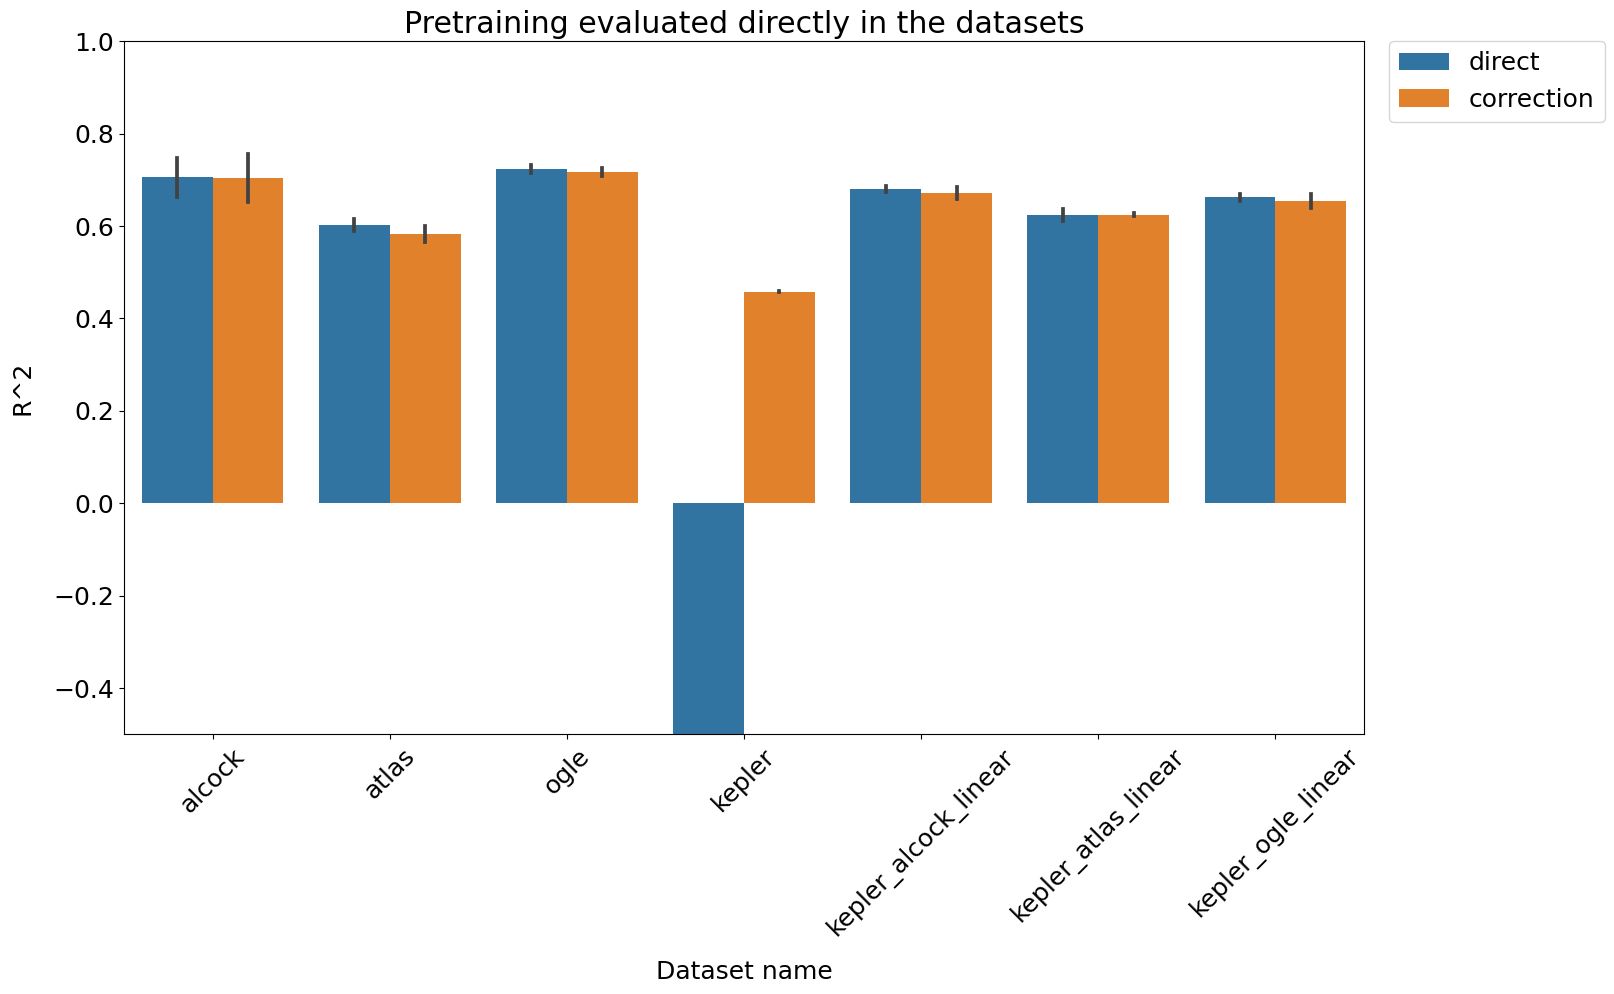

In [35]:
learning_rates = ['direct', 'correction']

df_results_pt = df_results[df_results['Learning rate'].isin(learning_rates)]

x = 'Dataset name'
y = 'R^2'
title = 'Pretraining evaluated directly in the datasets'.format(subsets[0])

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 9
rcParams.update({'font.size': 18})
rcParams['axes.labelpad'] = 14

bar_plot_ft(df_results_pt, x, y, title)

In [36]:
#ds_names = ['alcock', 'atlas', 'ogle', 'kepler', 'kepler_alcock_linear', 'kepler_atlas_linear', 'kepler_ogle_linear']
ds_names = ['alcock', 'atlas', 'ogle']

In [37]:
df_results_only_PE = df_results[df_results['Trainable layers'].isin(['Without FT', 'PE'])]

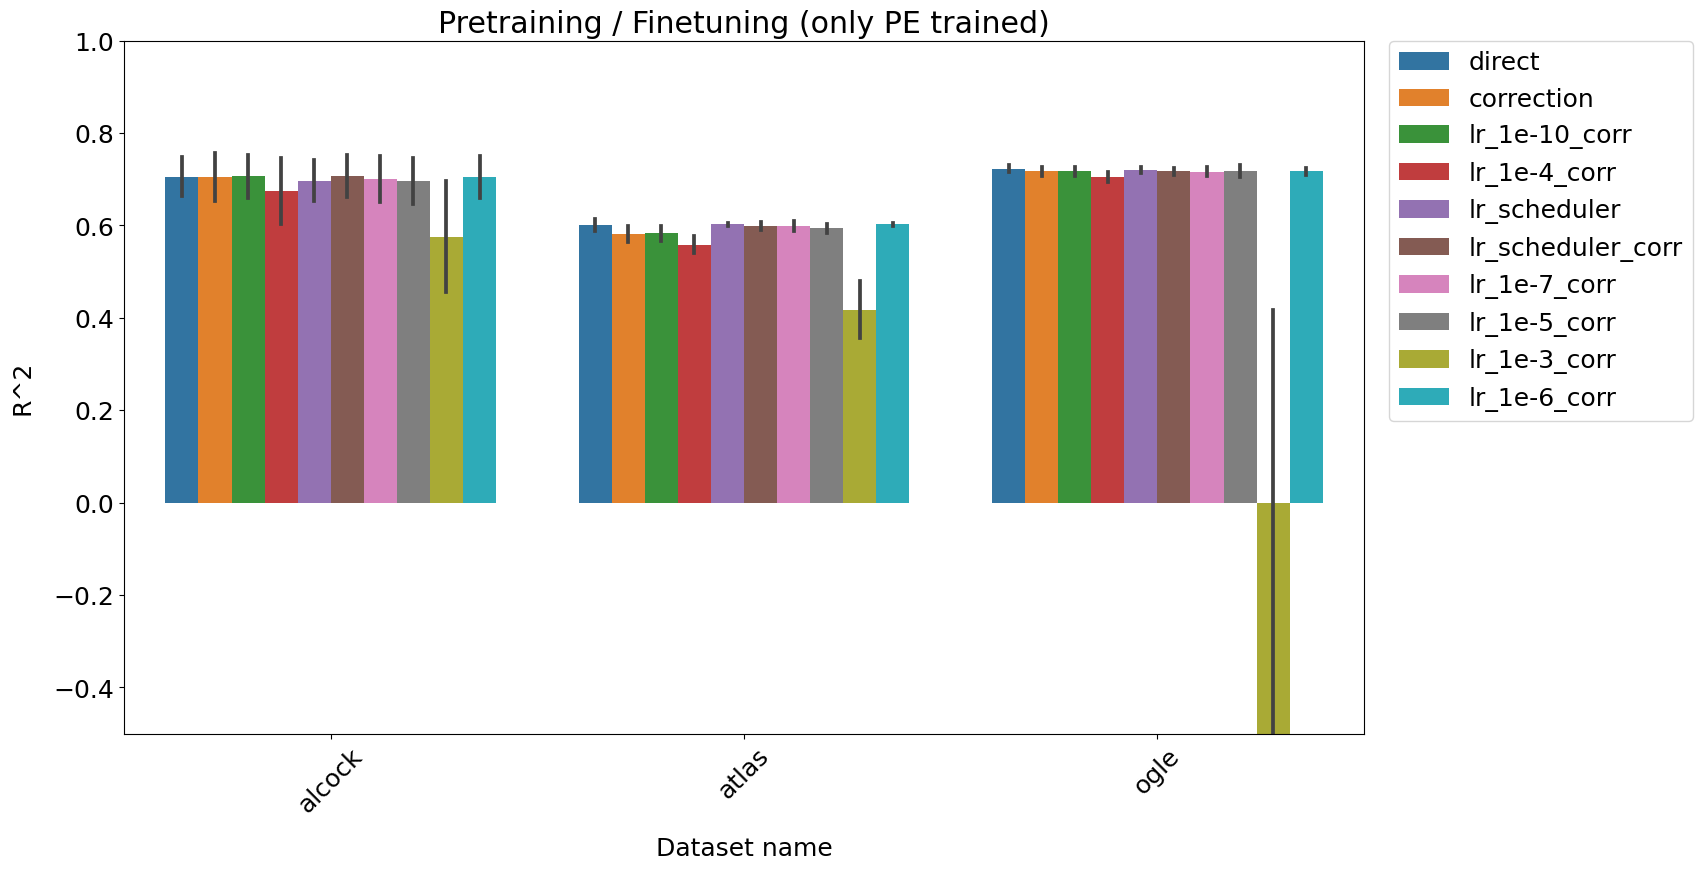

In [38]:
ds_names = ['alcock', 'atlas', 'ogle']

x = 'Dataset name'
y = 'R^2'
title = 'Pretraining / Finetuning (only PE trained)'.format(subsets[0])

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 9
rcParams.update({'font.size': 18})
rcParams['axes.labelpad'] = 14

bar_plot_ft(df_results_only_PE[df_results_only_PE['Dataset name'].isin(ds_names)], x, y, title)

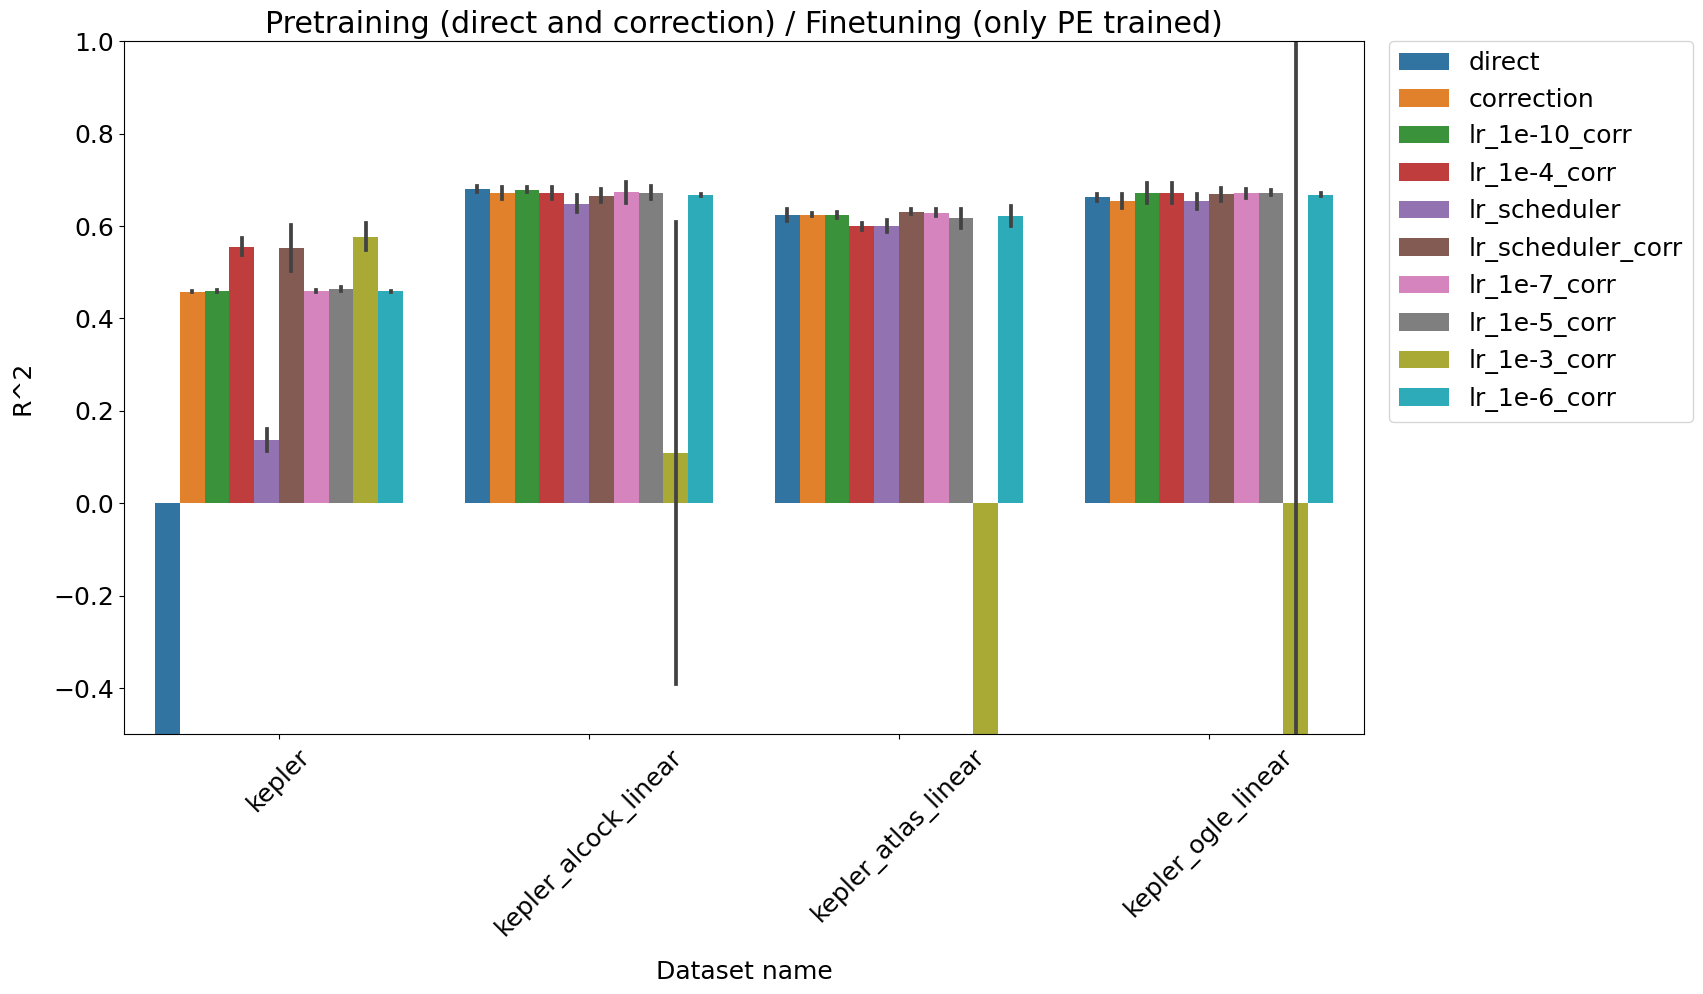

In [39]:
ds_names = ['kepler', 'kepler_alcock_linear', 'kepler_atlas_linear', 'kepler_ogle_linear']

x = 'Dataset name'
y = 'R^2'
title = 'Pretraining (direct and correction) / Finetuning (only PE trained)'.format(subsets[0])

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 9
rcParams.update({'font.size': 18})
rcParams['axes.labelpad'] = 14

bar_plot_ft(df_results_only_PE[df_results_only_PE['Dataset name'].isin(ds_names)], x, y, title)

In [40]:
def bar_plot(df, x, y, title):
  # who v/s fare barplot
  ax = sns.barplot(x = x,
                   y = y,
                   hue = 'Trainable layers',
                   data = df,
                   errorbar = 'sd').set(title=title)

  #place legend outside top right corner of plot
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.xticks(rotation=45)
  
  plt.ylim(-0.5, 1)

  # Show the plot
  plt.show()

In [41]:
df_results['Learning rate'].unique()

array(['direct', 'correction', 'lr_1e-10_corr', 'lr_1e-4_corr',
       'lr_scheduler', 'lr_scheduler_corr', 'lr_1e-7_corr',
       'lr_1e-5_corr', 'lr_1e-3_corr', 'lr_1e-6_corr'], dtype=object)

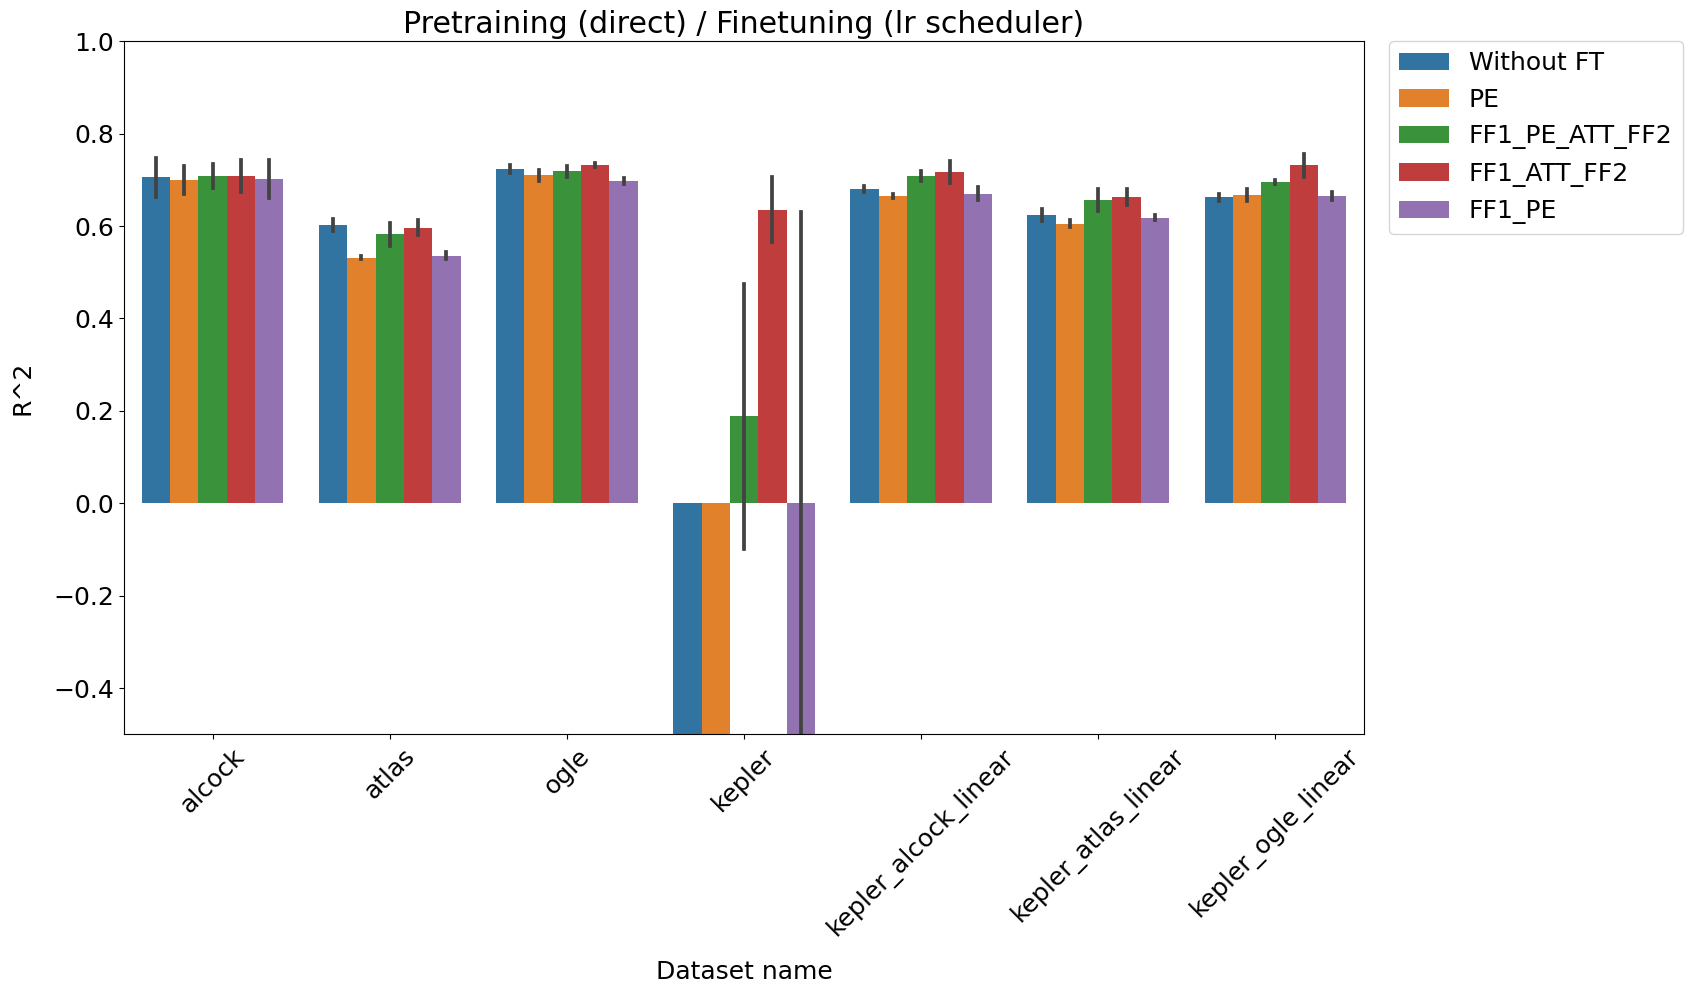

In [46]:
layers = ['direct', 'lr_scheduler'] #, 'lr_scheduler_corr'
df_results_all_ft = df_results[df_results['Learning rate'].isin(layers)]

#ds_names = ['alcock', 'atlas', 'ogle']

x = 'Dataset name'
y = 'R^2'
title = 'Pretraining (direct) / Finetuning (lr scheduler)'.format(subsets[0])

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 9
rcParams.update({'font.size': 18})
rcParams['axes.labelpad'] = 14

bar_plot(df_results_all_ft, x, y, title)

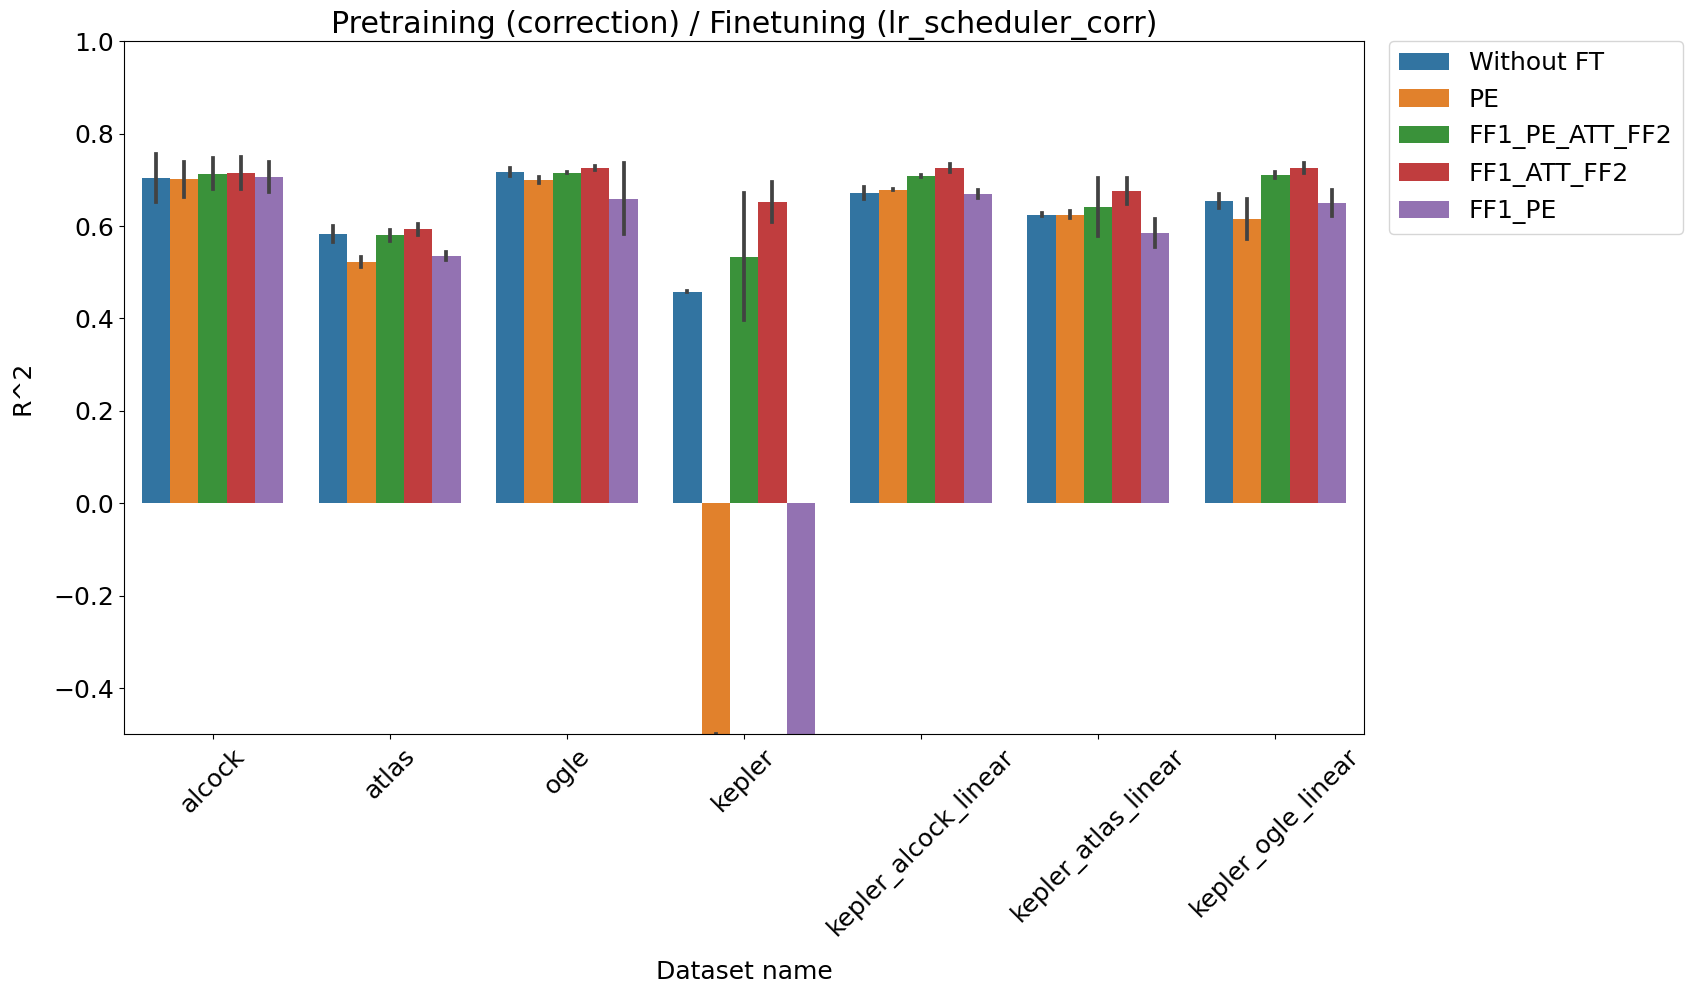

In [49]:
layers = ['correction', 'lr_scheduler_corr']
df_results_all_ft = df_results[df_results['Learning rate'].isin(layers)]

# ds_names = ['alcock', 'atlas', 'ogle']

x = 'Dataset name'
y = 'R^2'
title = 'Pretraining (correction) / Finetuning (lr_scheduler_corr)'.format(subsets[0])

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 9
rcParams.update({'font.size': 18})
rcParams['axes.labelpad'] = 14

bar_plot(df_results_all_ft, x, y, title)

## Pretraining evaluated directly in the datasets

In [75]:
df_results_filtered = df_results[df_results['Dataset name'] != 'ATLAS']
df_results_filtered

,Time Mean,Δ R^2 Mean,Δ RMSE Mean,Time Std,Δ R^2 Std,Δ RMSE Std,Dataset name,Trainable layers
0,91.066089,-0.001906,-0.000573,15.077792,0.004831,0.001698,ALCOCK,PE
1,256.629807,0.001123,0.000276,50.374743,0.003685,0.000873,ALCOCK,FF1_PE_ATT_FF2
2,174.979159,0.006132,0.000700,68.466115,0.000856,0.000906,ALCOCK,FF1_ATT_FF2
3,81.779074,-0.001386,0.000028,13.378001,0.001935,0.000783,ALCOCK,FF1_PE
8,349.037878,-0.002915,0.000979,43.793981,0.049844,0.001599,OGLE,PE
9,1092.578019,0.130629,0.008232,366.608726,0.004473,0.000225,OGLE,FF1_PE_ATT_FF2
10,981.372653,0.127116,0.007790,112.541414,0.005090,0.000266,OGLE,FF1_ATT_FF2
11,432.006693,0.042958,0.002641,121.378258,0.047326,0.001348,OGLE,FF1_PE


In [18]:
df_results_filtered = df_results.copy()

/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

Text(0.5, 29.000000000000014, 'Training time')

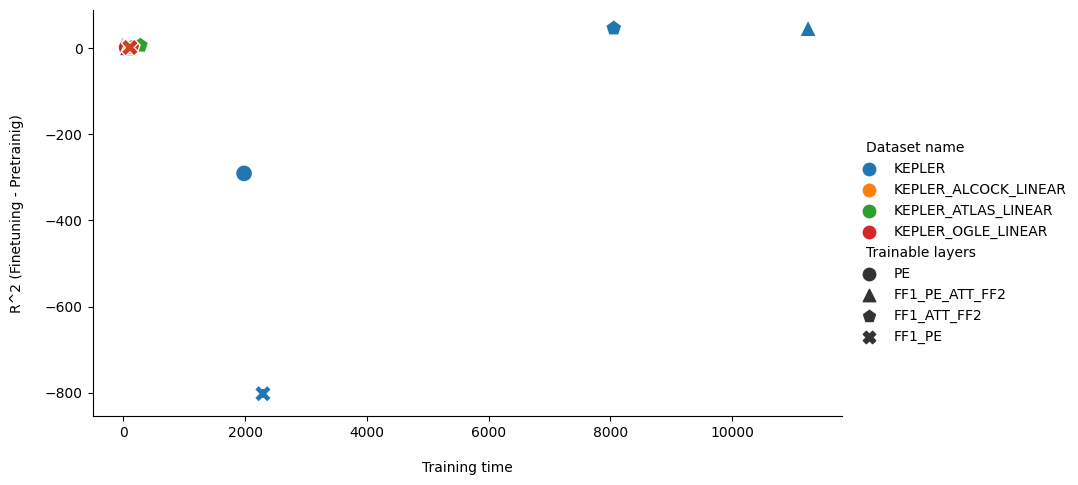

In [19]:
markers_set=['o', '^', 'p', 'X']


ax = sns.relplot(data=df_results_filtered, x='Time Mean', y=u'Δ R^2 Mean', hue='Dataset name', style='Trainable layers', s=150, height=4.8, aspect=1.8,
                 markers=markers_set)

markers, caps, bars = ax.ax.errorbar(df_results_filtered['Time Mean'], df_results_filtered[u'Δ R^2 Mean'],
                                     yerr=df_results_filtered[u'Δ R^2 Std'],
                                     #xerr=df_results['Time Std'],
                                     fmt='o',
                                     markersize=10,
                                     zorder=1, )

markers.set_markerfacecolor((1, 1, 0, 0.01))

for lh in ax._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [80] 

plt.ylabel('R^2 (Finetuning - Pretrainig)', labelpad=15)
plt.xlabel('Training time', labelpad=15)